# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time
import random

In [2]:
tf.__version__

'2.18.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('WF_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(y_train)

[0.29455124 0.38300961 0.16775791 ... 0.27727062 0.13834678 0.31615834]


##Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)


sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))


## Part 2 - Building the ANN

In [6]:
##Set fixed random seed

In [7]:
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

### Initializing the ANN

In [8]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=12, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

#ann = tf.keras.models.Sequential()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Adding the input layer and the first hidden layer

### Adding the 2nd, 3rd, and 4th hidden layers

In [9]:
#ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
#ann.add(tf.keras.layers.Dense(units=4, activation='relu'))


### Adding the output layer

In [10]:
#ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  # Default is 0.001, try 0.0005
ann.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

### Training the ANN model on the Training set

In [12]:
start_train = time.time()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
ann.fit(X_train, y_train, batch_size = 16, shuffle=True, epochs =100, validation_split=0.2, callbacks=[early_stopping])
#ann.fit(X_train, y_train, batch_size = 16, shuffle=False, epochs =100)
end_train = time.time()

Epoch 1/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.3047 - mae: 0.3907 - val_loss: 0.1119 - val_mae: 0.2239
Epoch 2/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1445 - mae: 0.2595 - val_loss: 0.1195 - val_mae: 0.2570
Epoch 3/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1310 - mae: 0.2447 - val_loss: 0.1051 - val_mae: 0.2315
Epoch 4/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1331 - mae: 0.2458 - val_loss: 0.1269 - val_mae: 0.2626
Epoch 5/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.1222 - mae: 0.2356 - val_loss: 0.0977 - val_mae: 0.2255
Epoch 6/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1220 - mae: 0.2349 - val_loss: 0.1335 - val_mae: 0.2753
Epoch 7/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.1153 - mae: 0.2287 - val_loss: 0.1033 - val_mae: 0.2331
Epoch 8/100
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1066 - mae: 0.2206 - val_loss: 0.1044 - val_mae: 0.2433
Epoch 9/100
1986/1986 ━━━━━━━━━

### Predicting the results of the Test set

In [13]:
start_pred = time.time()
y_pred = sc_y.inverse_transform(ann.predict(sc_X.transform(X_test)))
end_pred = time.time()

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[0.42 0.36]
 [0.4  0.41]
 [0.26 0.2 ]
 ...
 [0.78 0.78]
 [0.38 0.34]
 [0.18 0.12]]


## Plot

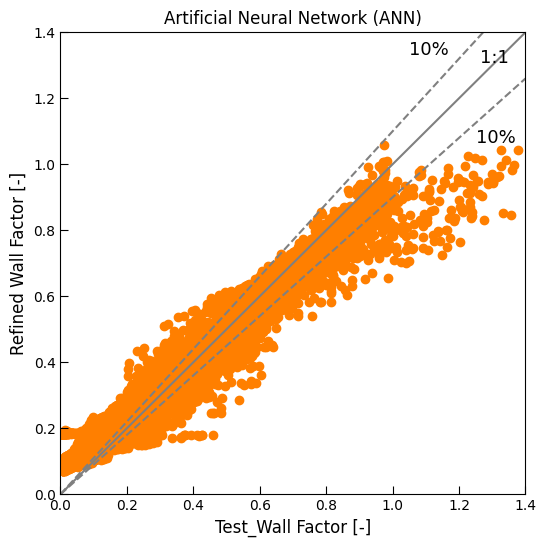

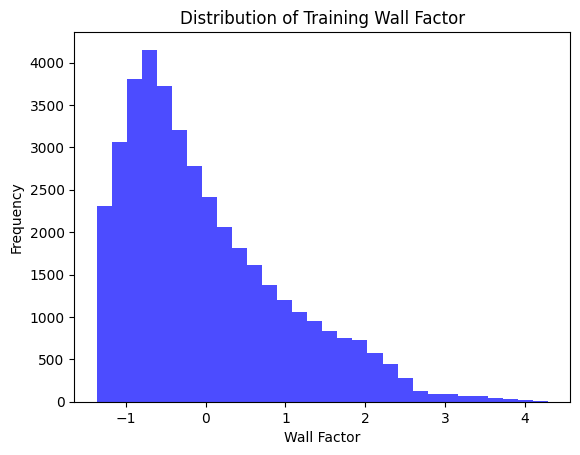

In [14]:
import matplotlib.pyplot as plt


# Set the font to Helvetica (widely available)
plt.rcParams['font.family'] = 'Helvetica'

# Stronger Orange for 20% Deviation Lines
strong_orange = '#FF7F00'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_test, y_pred, color=strong_orange, marker='o')

# Labels and title
plt.xlabel("Test_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("Artificial Neural Network (ANN)", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

plt.show()


import matplotlib.pyplot as plt
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.xlabel("Wall Factor")
plt.ylabel("Frequency")
plt.title("Distribution of Training Wall Factor")
plt.show()

##ANN Metrics

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R²): 0.9294058296035073
Root Mean Squared Error (RMSE): 0.06650385728362128
Mean Squared Error: 0.004422763033600266
Mean Absolute Error (MAE): 0.048552602516884626


In [16]:
import time

# Measure training time
training_time = end_train - start_train

# Measure prediction time
prediction_time = end_pred - start_pred

print(f"Training Time: {training_time:.5f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

Training Time: 134.94339 seconds
Prediction Time: 0.69320 seconds


## Vancouver Building WF

##Import Exp_data

In [17]:
dataset = pd.read_csv('VB_EXP.csv')
X_VB = dataset.iloc[:, :-1].values
y_VB = dataset.iloc[:, -1].values

##WF_VB prediction

In [18]:
start_pred_VB = time.time()
y_pred_VB = sc_y.inverse_transform(ann.predict(sc_X.transform(X_VB)))
end_pred_VB = time.time()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


##Plot _ VB

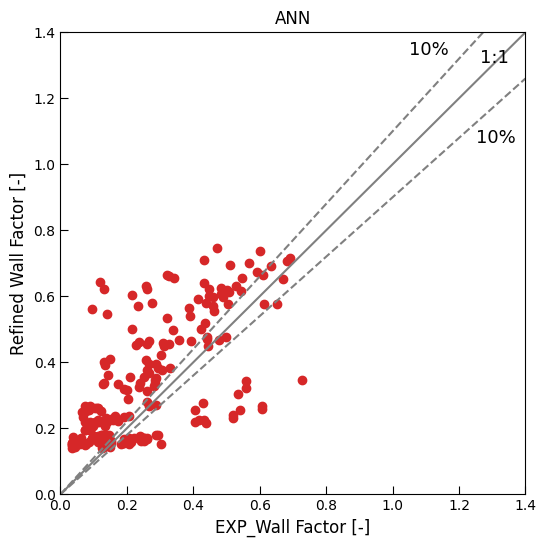

In [19]:
import matplotlib.pyplot as plt

# Stronger Orange for 20% Deviation Lines
strong_orange = '#D62728'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_VB, y_pred_VB, color=strong_orange, marker='o')

# Labels and title
plt.xlabel("EXP_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("ANN", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

plt.show()

##ML models metrics


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Flatten WF_EXP to 1D
y_pred_VB = y_pred_VB.flatten()


#----------------------------------------------
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient (r)
r, _ = pearsonr(y_VB, y_pred_VB)

# Compute R²
r_squared = r ** 2
print(f"R-squared (R²): {r_squared}")
#-----------------------------------------------

r2 = r2_score(y_VB, y_pred_VB)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_VB, y_pred_VB))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_VB, y_pred_VB)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_VB, y_pred_VB)
print(f"Mean Absolute Error (MAE): {mae}")

#######################
print("y_VB (first 5):", y_VB[:5])
print("y_pred_VB (first 5):", y_pred_VB[:5])

# Flatten WF_EXP to 1D
y_pred_VB = y_pred_VB.flatten()

# Calculate individual errors
individual_errors = (np.abs(y_pred_VB - y_VB) / y_VB) * 100
average_error = np.mean(individual_errors)

print("y_VB (first 5):", y_VB[:5])
print("y_pred_VB (first 5):", y_pred_VB[:5])
print("Individual Errors (first 5, %):", individual_errors[:5])
print(f"Average Error: {average_error:.2f}%")

R-squared (R²): 0.4453842548279776
R-squared (R²): 0.09694191104302285
Root Mean Squared Error (RMSE): 0.1629617759115013
Mean Squared Error: 0.026556540408230366
Mean Absolute Error (MAE): 0.12975623857260973
y_VB (first 5): [0.6  0.32 0.15 0.43 0.32]
y_pred_VB (first 5): [0.74 0.53 0.41 0.28 0.66]
y_VB (first 5): [0.6  0.32 0.15 0.43 0.32]
y_pred_VB (first 5): [0.74 0.53 0.41 0.28 0.66]
Individual Errors (first 5, %): [ 23.09  66.19 172.8   35.68 106.46]
Average Error: 78.15%


In [21]:
import time


# Measure VB prediction time
prediction_time_VB = end_pred_VB - start_pred_VB

print(f"Prediction Time_VB: {prediction_time_VB:.5f} seconds")

Prediction Time_VB: 0.13522 seconds


## Vancouver Building WF _______ Overhang

##Import Exp_data

In [22]:
dataset = pd.read_csv('VB_EXP_Overhang.csv')
X_VBO = dataset.iloc[:, :-1].values
y_VBO = dataset.iloc[:, -1].values

##WF_VB prediction

In [23]:
start_pred_VBO = time.time()
y_pred_VBO = sc_y.inverse_transform(ann.predict(sc_X.transform(X_VBO)))
end_pred_VBO = time.time()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


##Plot _ VB

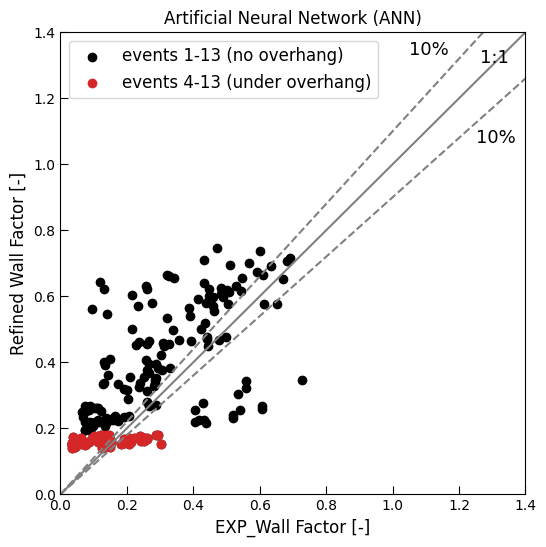

In [24]:
import matplotlib.pyplot as plt

# Stronger Orange for 20% Deviation Lines
strong_orange = '#D62728'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_VB, y_pred_VB, color='k', marker='o', label='events 1-13 (no overhang)')
# Create scatter plot
plt.scatter(y_VBO, y_pred_VBO, color=strong_orange, marker='o', label='events 4-13 (under overhang)')

# Labels and title
plt.xlabel("EXP_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("Artificial Neural Network (ANN)", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

# Add legend
plt.legend(loc='upper left', fontsize=12)

plt.show()

##ML models metrics


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


r2 = r2_score(y_VBO, y_pred_VBO)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_VBO, y_pred_VBO))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_VBO, y_pred_VBO)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_VBO, y_pred_VBO)
print(f"Mean Absolute Error (MAE): {mae}")


R-squared (R²): 0.030236294695169308
Root Mean Squared Error (RMSE): 0.07508720193268782
Mean Squared Error: 0.005638087894080238
Mean Absolute Error (MAE): 0.06604803168021475


In [26]:
import time


# Measure VB prediction time
prediction_time_VB = end_pred_VB - start_pred_VB

print(f"Prediction Time_VB: {prediction_time_VB:.5f} seconds")

Prediction Time_VB: 0.13522 seconds


## VB Wall Factor (WF) Contour

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load data
#data = np.loadtxt('Case01_U2.csv', delimiter=',', skiprows=1)
#wf = data[:, 10]  # Python uses 0-based indexing
#y = data[:, 7]
#x = data[:, 8]

dataset_plot = pd.read_csv('VB_plot.csv')
X_VB_plot = dataset_plot.iloc[:, :].values
y = dataset_plot.iloc[:, 0] * dataset_plot.iloc[:, 5]
x = dataset_plot.iloc[:, 1] * dataset_plot.iloc[:, 6]

y_pred_VB_plot = sc_y.inverse_transform(ann.predict(sc_X.transform(X_VB_plot)))
y_pred_VB_plot = y_pred_VB_plot.ravel()
print(x.shape, y.shape, y_pred_VB_plot.shape)

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10201,) (10201,) (10201,)


Interpolated values at (xx, yy):
[0.11 0.11 0.11 0.12 0.12 0.13 0.14 0.15 0.15 0.16 0.17 0.17 0.17 0.18
 0.18 0.18 0.18 0.18 0.18 0.18 0.19 0.19 0.19 0.19 0.19 0.19 0.19 0.19
 0.19]


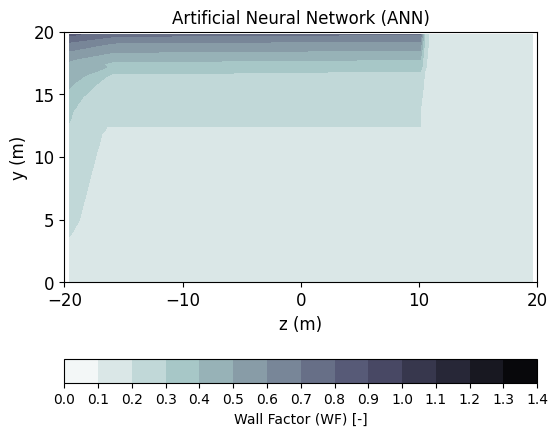

In [28]:



# Create a grid of points for interpolation
X = np.linspace(min(x), max(x), 100)
Y = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(X, Y)

# Perform interpolation
wf_interp = griddata((x, y), y_pred_VB_plot, (X, Y), method='linear')

# Plotting
plt.figure(figsize=(6.1, 5))
contour_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
contour = plt.contourf(X, Y, wf_interp, levels=contour_levels, cmap=plt.cm.bone_r)
plt.colorbar(contour, orientation='horizontal', ticks=contour_levels, label='Wall Factor (WF) [-]', pad=0.2)
plt.xticks(np.arange(-20, 20.0001, 10), fontsize=12)
plt.yticks(np.arange(0, 20.1, 5), fontsize=12)


# Scatter plot
xx = np.zeros(29)
yy = np.array([0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.25, 8.5, 8.75, 9, 9.2, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10])



wf_mid = griddata((x, y), y_pred_VB_plot, (xx, yy), method='linear')

# Labels and title
plt.xlabel("z (m)", fontsize=12,)
plt.ylabel("y (m)", fontsize=12)
plt.title("Artificial Neural Network (ANN)", fontsize=12)

# Print the interpolated values
print("Interpolated values at (xx, yy):")
print(wf_mid)


plt.show()
